## DataFrame
```
uid                     id użytkownika
lang                    ustawiony język
identified_as_person    czy dany użytkownik jest sklasyfikowany jako osoba

Mon                     % tweetów w poniedziałek
Tue                     % tweetów we wtorek
Wed                     % tweetów w środę
Thu                     % tweetów w czwartek
Fri                     % tweetów w piątek
Sat                     % tweetów w sobotę
Sun                     % tweetów w niedzielę

h_0                     % tweetów w godzinach 0-5
h_6                     % tweetów w godzinach 6-11
h_12                    % tweetów w godzinach 12-17
h_18                    % tweetów w godzinach 18-23

avrg_fav_count          średnia liczba polubień pod tweetem
avrg_retweet_count      średnia liczba retweetów 

favourites_count        liczba użytkowników których ten użytkownik śledzi
followers_count         liczba użytkowników którzy śledzą tego użytkownika
friends_count           liczba obustronnych relacji follow/favourite
numberoftweets          liczba tweetów
numberofnonurltweets    liczba tweetów nie zawierających URL

url_tweet_ratio         stosunek liczby tweetów bez URL do liczby wszystkich tweetów
```

TODO:
 - most mentioned user
 - most liked tweet
 - most retweeted tweet
 - user with most tweets
 - user with most friends
 - user with most followers
 - top URL
 - top hashtags

In [13]:
import numpy as np
import pandas as pd


N = 10000

df = pd.read_csv('final.csv', nrows=N)

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
Unnamed: 0              10000 non-null int64
Fri                     10000 non-null float64
Mon                     10000 non-null float64
Sat                     10000 non-null float64
Sun                     10000 non-null float64
Thu                     10000 non-null float64
Tue                     10000 non-null float64
Wed                     10000 non-null float64
avrg_fav_count          10000 non-null float64
avrg_retweet_count      10000 non-null float64
h_0                     10000 non-null float64
h_12                    10000 non-null float64
h_18                    10000 non-null float64
h_6                     10000 non-null float64
uid                     10000 non-null int64
favourites_count        10000 non-null float64
lang                    10000 non-null object
followers_count         10000 non-null float64
friends_count           10000 non-null float64
numb

In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt


def plot_trimmed_data(data, field):
    SIGMA = 2

    raw = pd.DataFrame(data[[field, 'identified_as_person']])
    
    #keep only the ones that are within +SIGMA to -SIGMA standard deviations
    trimmed = raw[np.abs(raw[field]-raw[field].mean())<=(SIGMA*raw[field].std())] 
    

    fig, (ax1, ax2) = plt.subplots(1, 2)
    groups = raw.groupby('identified_as_person')[field]
    for k, v in groups:
        v.hist(label='a', alpha=.7, ax=ax1, bottom=1, bins=50)

    ax1.set_title('%s (raw data)' % field)
    ax1.legend(['Not person', 'Person'])
    ax1.set_yscale('log')

    groups = trimmed.groupby('identified_as_person')[field]
    for k, v in groups:
        v.hist(label='a', alpha=.7, ax=ax2, bottom=1, bins=50)

    rm_count = raw.shape[0] - trimmed.shape[0]
    ax2.set_title(r'%s ($\pm %s \sigma$, %s out of %s removed)' % (field, SIGMA, rm_count, raw.shape[0]))
    ax2.legend(['Not person', 'Person'])
    ax2.set_yscale('log')

<IPython.core.display.Javascript object>


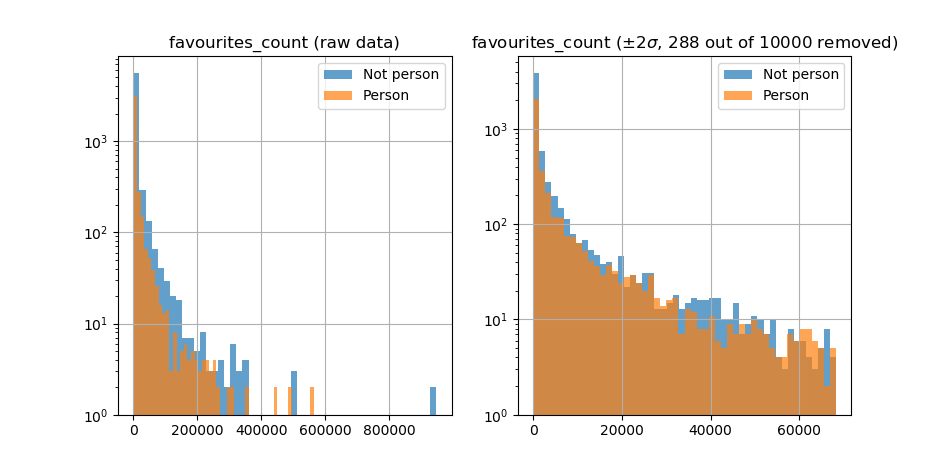

In [17]:
plot_trimmed_data(df, 'favourites_count')

<IPython.core.display.Javascript object>


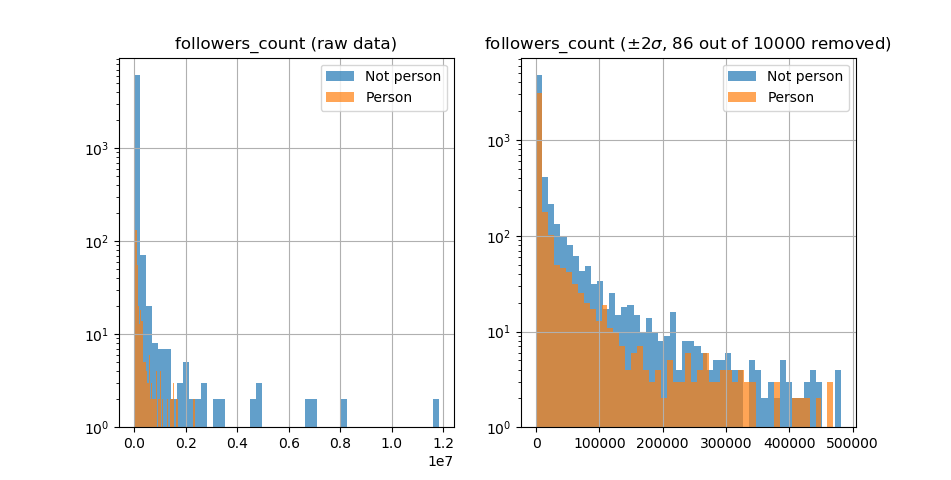

In [19]:
plot_trimmed_data(df, 'followers_count')

<IPython.core.display.Javascript object>


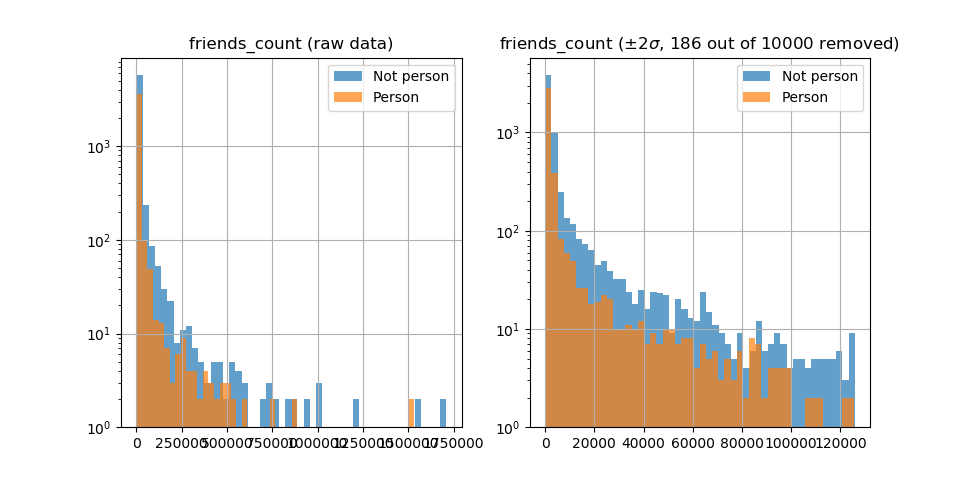

In [20]:
plot_trimmed_data(df, 'friends_count')

<IPython.core.display.Javascript object>


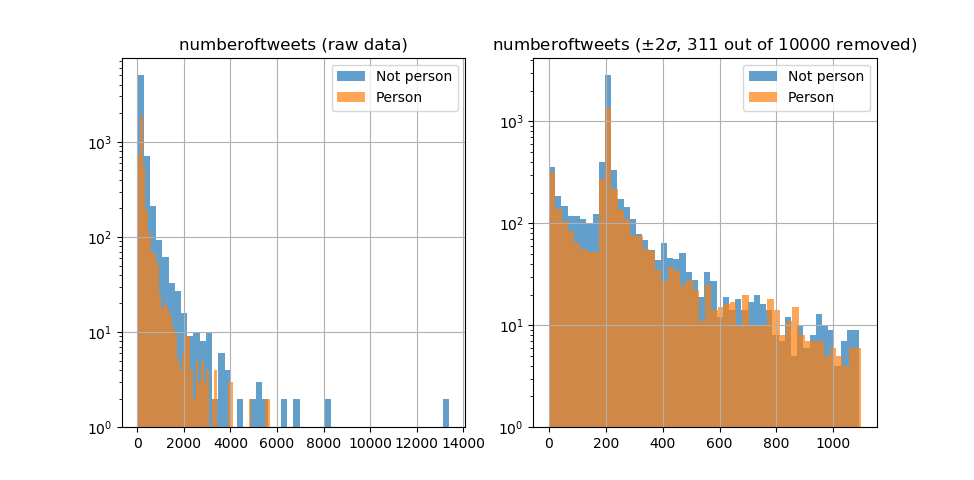

In [21]:
plot_trimmed_data(df, 'numberoftweets')

<IPython.core.display.Javascript object>


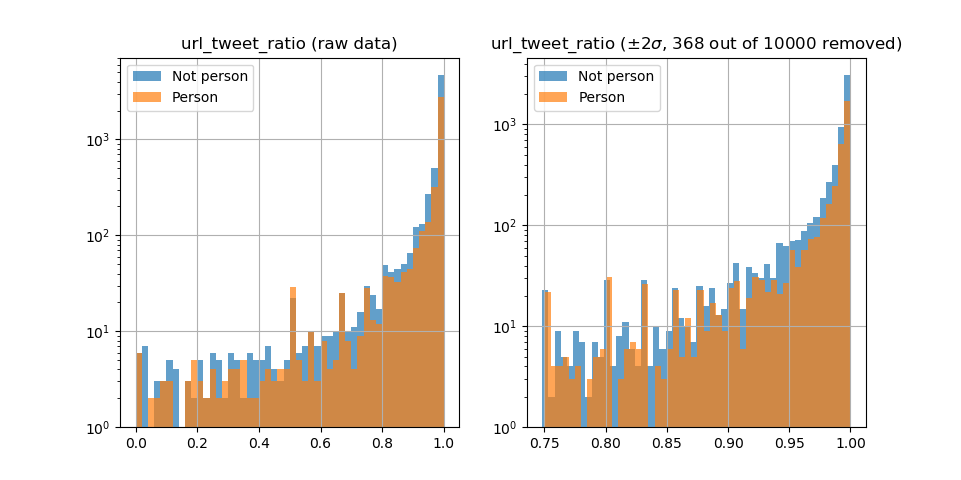

In [22]:
plot_trimmed_data(df, 'url_tweet_ratio')

<IPython.core.display.Javascript object>


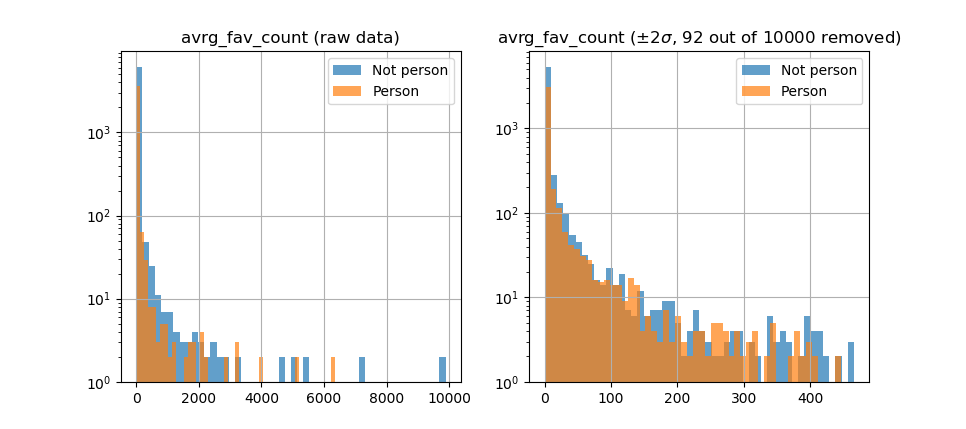

In [23]:
plot_trimmed_data(df, 'avrg_fav_count')

<IPython.core.display.Javascript object>


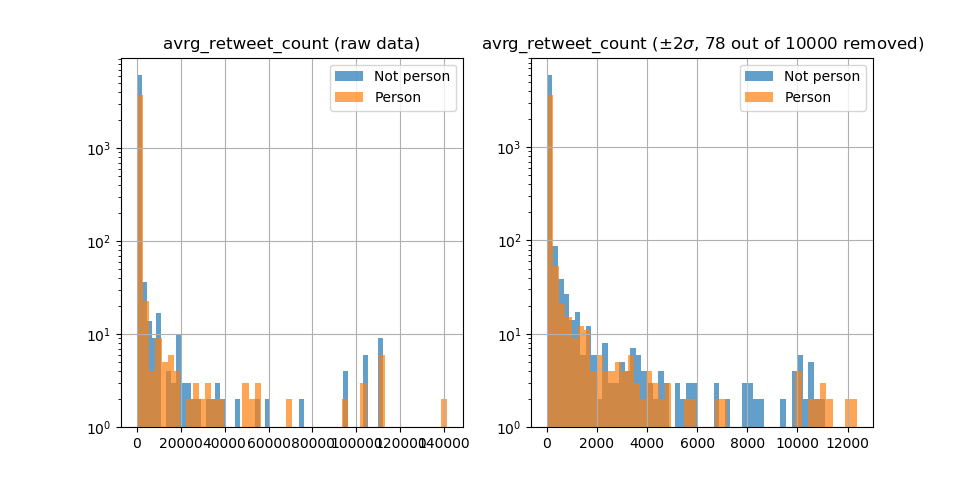

In [24]:
plot_trimmed_data(df, 'avrg_retweet_count')

<IPython.core.display.Javascript object>


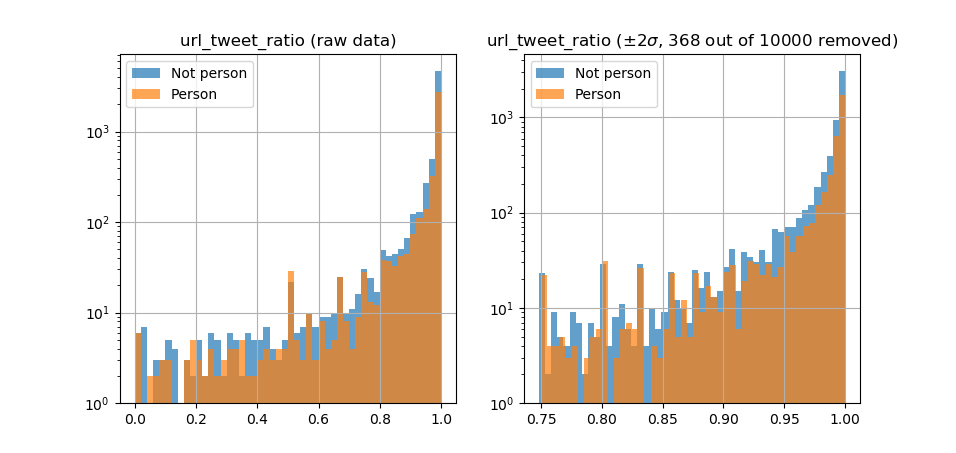

In [63]:
plot_trimmed_data(df, 'url_tweet_ratio')

<IPython.core.display.Javascript object>


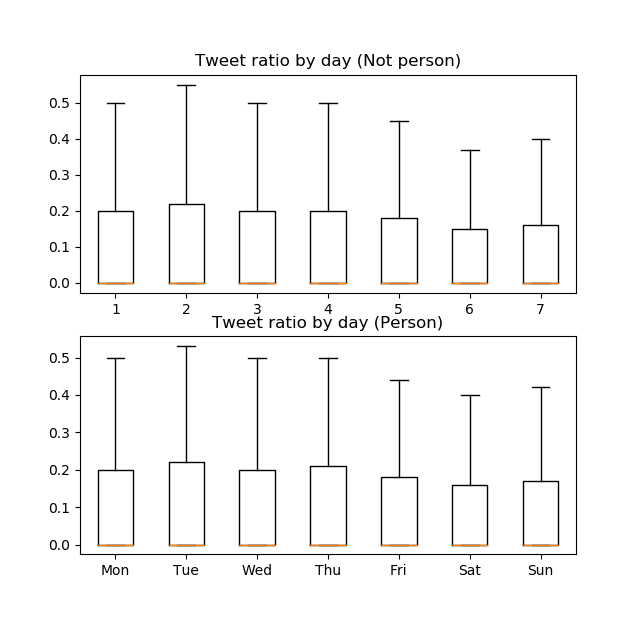

In [75]:
dff = df[['identified_as_person', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]
persons = dff[(dff.identified_as_person=='t')]
not_persons = dff[(dff.identified_as_person=='f')]

fig, [ax1, ax2] = plt.subplots(2, 1)

ax2.set_title('Tweet ratio by day (Person)')
ax2.boxplot([persons.Mon, persons.Tue, persons.Wed, persons.Thu, persons.Fri, persons.Sat, persons.Sun], 
            showfliers=False)


ax1.set_title('Tweet ratio by day (Not person)')
ax1.boxplot([not_persons.Mon, not_persons.Tue, not_persons.Wed, not_persons.Thu, not_persons.Fri, 
             not_persons.Sat, not_persons.Sun], 
            showfliers=False)

plt.xticks([1, 2, 3, 4, 5, 6, 7], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.show()

<IPython.core.display.Javascript object>


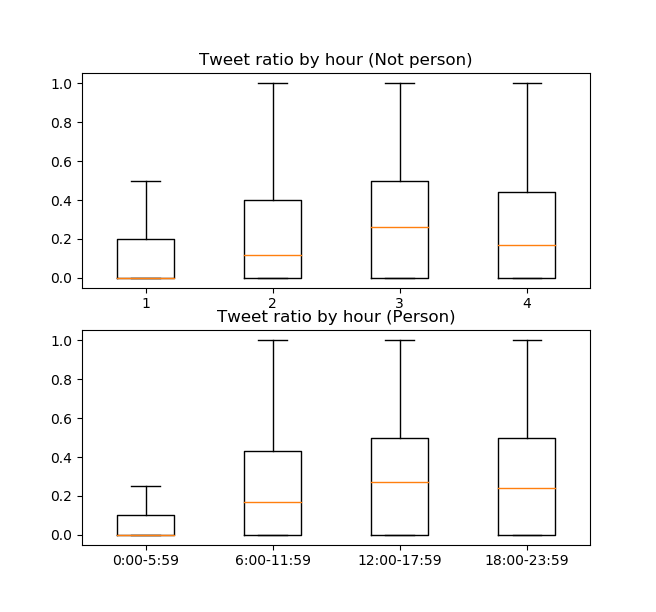

In [77]:
dff = df[['identified_as_person', 'h_0', 'h_6', 'h_12', 'h_18']]
persons = dff[(dff.identified_as_person=='t')]
not_persons = dff[(dff.identified_as_person=='f')]

fig, [ax1, ax2] = plt.subplots(2, 1)

ax2.set_title('Tweet ratio by hour (Person)')
ax2.boxplot([persons.h_0, persons.h_6, persons.h_12, persons.h_18], showfliers=False)

ax1.set_title('Tweet ratio by hour (Not person)')
ax1.boxplot([not_persons.h_0, not_persons.h_6, not_persons.h_12, not_persons.h_18], showfliers=False)

plt.xticks([1, 2, 3, 4], ['0:00-5:59', '6:00-11:59', '12:00-17:59', '18:00-23:59'])

plt.show()

<IPython.core.display.Javascript object>


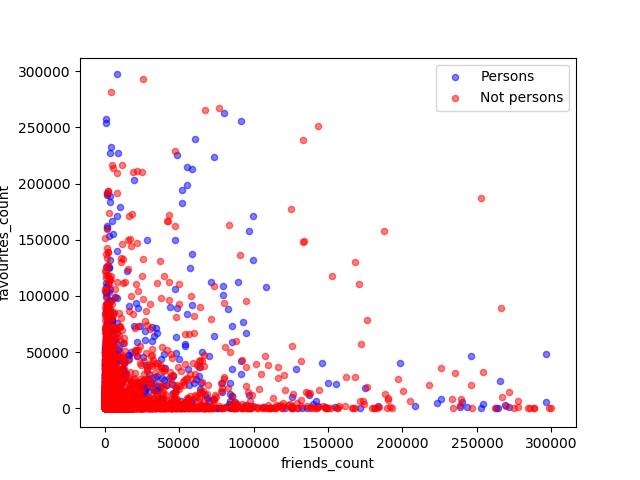

In [79]:
# Check friends_count around 5000
persons = df[(df.identified_as_person=='t') & (df.favourites_count<300000) & (df.friends_count<300000)]
not_persons = df[(df.identified_as_person=='f') & (df.favourites_count<300000) & (df.friends_count<300000)]

ax = persons.plot.scatter(x='friends_count', y='favourites_count', color='blue', label="Persons", alpha=.5)
not_persons.plot.scatter(x='friends_count', y='favourites_count', color='red', label="Not persons", ax=ax, alpha=.5)